# Classification. Linear models and KNN

In [79]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [80]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import plot_confusion_matrix, accuracy_score
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures

## Part 1: Titanic survival prediction

### Dataset

Read the description here: https://www.kaggle.com/c/titanic/data. Download the dataset and place it in the *data/titanic/* folder in your working directory.
You will use train.csv for model training and validation. The test set is used for model testing: once the model is trained, you can predict whether a passenger survived or not for each passenger in the test set, and submit the predictions: https://www.kaggle.com/c/titanic/overview/evaluation.  


In [81]:
PATH = "./data/"

In [82]:
data = pd.read_csv(os.path.join(PATH, 'titanic', 'train.csv')).set_index('PassengerId')

In [83]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### EDA

**(0.5 points)** How many females and males are there in the dataset? What about the survived passengers? Is there any relationship between the gender and the survival?

In [84]:
m, f = data.loc[(data.Sex == 'male')].shape[0], data.loc[(data.Sex == 'female')].shape[0]
m_s, f_s = data.loc[(data.Sex == 'male') & (data.Survived==1)].shape[0], data.loc[(data.Sex == 'female') & (data.Survived==1)].shape[0]
m_p, f_p = m_s*100/m, f_s*100/f

f_list = [f, f_s, f_p]
m_list = [m, m_s, m_p]
score_plt = pd.DataFrame(columns=['quantity', 'survived', 'survived %'], index=['female', 'male'])
for x,y in enumerate(score_plt.columns):
    score_plt[y][0] = f_list[x]
    score_plt[y][1] = m_list[x]
score_plt

,quantity,survived,survived %
female,314,233,74.203822
male,577,109,18.890815


Females had much more chances to survive.

**(0.5 points)** Plot age distribution of the passengers. What is the average and the median age of survived and deceased passengers? Do age distributions differ for survived and deceased passengers? Why?

Average age of all the passengers:  29.69911764705882
Median age of all the passengers:  28.0


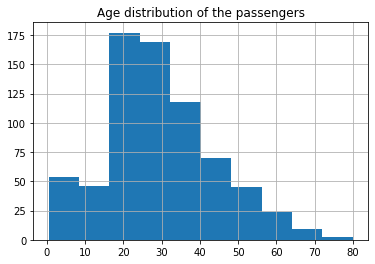

In [85]:
print ('Average age of all the passengers: ', data.Age.mean())
print ('Median age of all the passengers: ', data.Age.median())
data.Age.hist()
plt.title('Age distribution of the passengers')
plt.show()

Average age of survived passengers:  28.343689655172415
Median age of survived passengers:  28.0


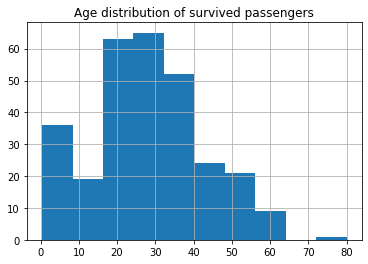

In [86]:
survived = data.loc[(data.Survived==1)]
print ('Average age of survived passengers: ', survived.Age.mean())
print ('Median age of survived passengers: ', survived.Age.median()) 
survived.Age.hist()
plt.title('Age distribution of survived passengers')
plt.show()

Average age of deceased passengers:  30.62617924528302
Median age of deceased passengers:  28.0


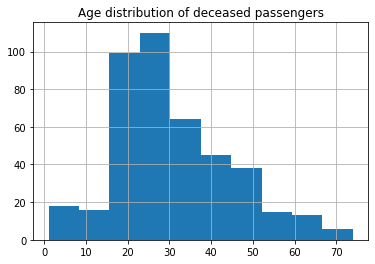

In [87]:
deceased = data.loc[(data.Survived==0)]
print ('Average age of deceased passengers: ', deceased.Age.mean())
print ('Median age of deceased passengers: ', deceased.Age.median())
deceased.Age.hist()
plt.title('Age distribution of deceased passengers')
plt.show()

We all have seen Titanic. We all perfectly remember the main rule for getting ur place in a lifeboat - "Children and women first". So age distribution plots show us that u were likely to survive if you were a kid (~ 10 y. o.) or under 40. But at the same time we notice a huge amount of deceased young people (20-30 y. o.). By the way this age category (20-30 y.o.) is kinda widespread, that's why the median age of both survived and deceased passengers is 28 y.o.

**(1 point)** Explore "passenger class" and "embarked" features. What class was "the safest"? Is there any relationship between the embarkation port and the survival? Provide the corresponding visualizations.

,Class 1,Class 2,Class 3
survived %,62.962963,47.282609,24.236253


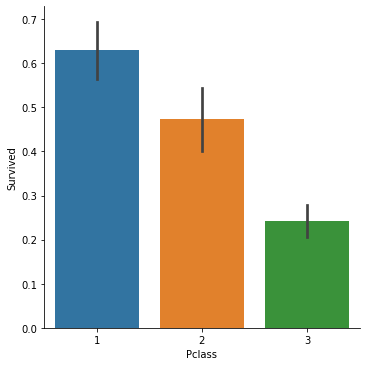

In [88]:
# amount of survived for each class
c1_s, c2_s, c3_s = survived.loc[(survived.Pclass==1)].shape[0], survived.loc[(survived.Pclass==2)].shape[0], survived.loc[(survived.Pclass==3)].shape[0]

# amount of all passengers for each class
c1, c2, c3 = data.loc[(data.Pclass==1)].shape[0], data.loc[(data.Pclass==2)].shape[0], data.loc[(data.Pclass==3)].shape[0]

# percentage of survived passengers for each class
c1_p, c2_p, c3_p = c1_s/c1*100, c2_s/c2*100, c3_s/c3*100
p_list = [c1_p, c2_p, c3_p]

classes = data.Pclass.unique()

score_plt = pd.DataFrame(columns=['Class 1', 'Class 2', 'Class 3'], index=['survived %'])
for x,y in enumerate(score_plt.columns):
    score_plt[y][0] = p_list[x]


sns.catplot(x="Pclass", 
                y="Survived", 
                kind="bar", 
                data=data)

score_plt

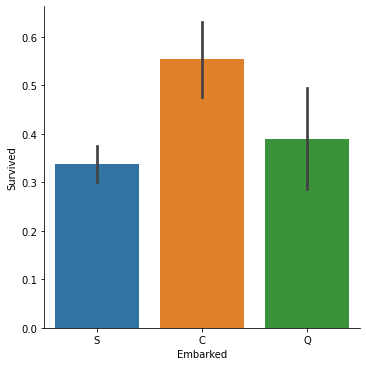

In [89]:
sns.catplot(x="Embarked", 
                y="Survived", 
                kind="bar", 
                data=data)

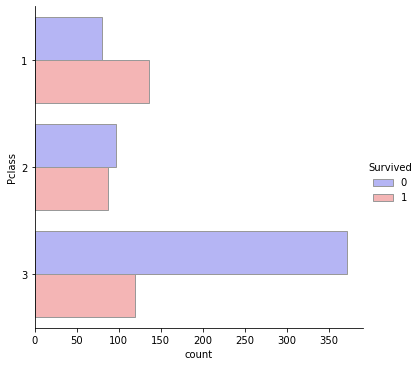

In [90]:
sns.catplot(y="Pclass",  hue="Survived", kind="count", 
            palette="bwr", edgecolor=".6",
            data=data)

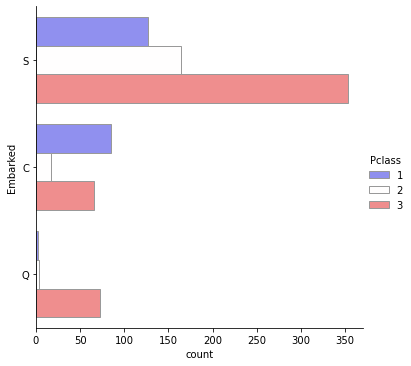

In [91]:
sns.catplot(y="Embarked",  hue="Pclass", kind="count", 
            palette="bwr", edgecolor=".6",
            data=data)

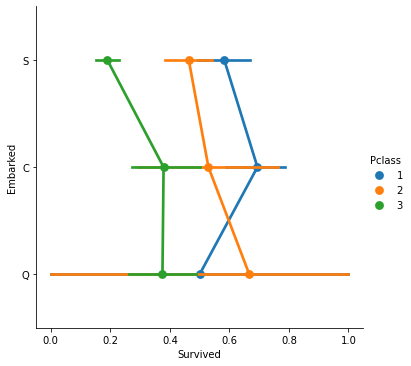

In [92]:
sns.catplot(x="Survived", y="Embarked", hue="Pclass", kind="point", data=data)

As we can see the safest class is Class 1 (nearly 63% of such passengers survived). 

So the higher class, the more chances to survive.

The safest embarkation is port S because most of First Class passengers were embarked from there and most of First Class passengers survived. Coinsidence? No...

### Modelling

**(0.5 points)** Find the percentage of missing values for each feature. 

In [93]:
percent_missing = data.isnull().sum() * 100 / len(data)
missing_value_df = pd.DataFrame({'feature': data.columns,
                                 'percent_missing': percent_missing})
missing_value_df

,feature,percent_missing
Survived,Survived,0.000000
Pclass,Pclass,0.000000
Name,Name,0.000000
Sex,Sex,0.000000
Age,Age,19.865320
SibSp,SibSp,0.000000
Parch,Parch,0.000000
Ticket,Ticket,0.000000
Fare,Fare,0.000000
Cabin,Cabin,77.104377



Think about the ways to handle these missing values for modelling and write your answer below. Which methods would you suggest? What are their advantages and disadvantages?

1) Age

I decided to use median values for missing values. Age wasn't a decisive factor (see plots above), so such strategy won't affect our dataset.

2) Cabin

I deciced to drop this column. Of course there's relationship between cabin number and lifeboats location. If the cabin was located in the top part of the ship, its passengers had quicker access to the lifeboats, it means such passengers were likely to survive. Cabin location meant ur passenger class, so rich people lived in higher cabins, the others lived below. We've already found the dependency between survival and passenger class.

3) Embarked

Most of the passengers emarked from S (Southampton), so I decided to use the most frequent value (S) instead of missing values.

**(1.5 points)** Prepare the features and train two models (KNN and Logistic Regression) to predict the survival. Compare the results. Use accuracy as a metric. Don't forget about cross-validation!

In [94]:
train = data.copy()
test_df = pd.read_csv(os.path.join(PATH, 'titanic', 'test.csv')).set_index('PassengerId')

my_data = [train, test_df]

for df in my_data:
    # preprocess categorical feature (Sex) to numeric
    df['Sex'] = df['Sex'].apply(lambda x: 1 if x=="male" else 2)
    
    # replace nan values with median
    df["Age"].fillna(df.Age.median(), inplace=True)
    # there were more chances to survive if u were young
    df["Age"] = df['Age'].apply(lambda x: 2 if x<=35 else 1)
    
    # replace nan values with the most frequent value
    df["Embarked"].fillna('S', inplace=True)
    df['Embarked'] = df['Embarked'].map( {'Q': 1, 'C': 2, 'S': 3} ).astype(int)
    
    # it was more likely to take ur seat in a lifeboat 
    # if you weren't alone (sister/brother, children, wife/husband)
    df['Family'] = df['Parch'] + df['SibSp']
    
    # your survival depended on ur status (including ur sex, rank & marital status)
    # please look at the plot below
    df['Title'] = df.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    df['Title'] = df['Title'].replace(['Don', 'Rev', 'Dr', 'Major', 'Lady', 'Sir', 'Col', 'Capt', 'Countess', 'Jonkheer' 'Dona'], 'Rare')
    
    df['Title'] = df['Title'].replace('Mlle', 'Miss')
    df['Title'] = df['Title'].replace('Ms', 'Miss')   
    df['Title'] = df['Title'].replace('Mme', 'Mrs')

    title_map = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
    df['Title'] = df['Title'].map(title_map)
    df['Title'] = df['Title'].fillna(0)
    
    
    features_to_drop = ['Name', 'Ticket', 'SibSp', 'Parch', 'Fare', 'Cabin']

    df.drop(columns=features_to_drop, inplace=True)
    
    
#splitting data
y = train['Survived']
X = train.drop(columns=['Survived'])

features_train, features_test, labels_train, labels_test = train_test_split(X, y, test_size=0.3, random_state=42)


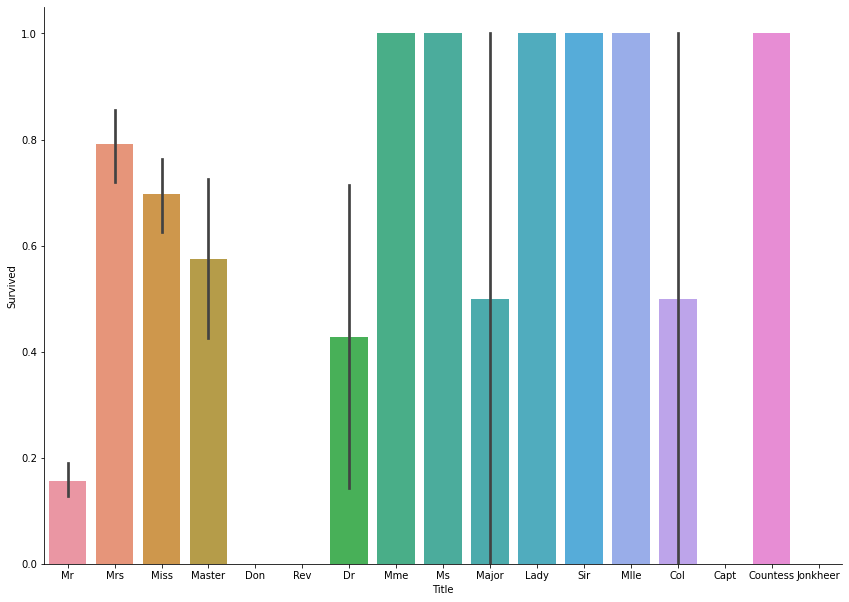

In [95]:
data['Title'] = data.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
sns.catplot(x="Title", 
                y="Survived", 
                kind="bar", 
                data=data, height=8.27, aspect=11.7/8.27)

In [96]:
from sklearn.linear_model import LogisticRegression

log_reg = Pipeline([
    ('classifier', LogisticRegression(solver='liblinear', penalty='l1'))])

print(f"Logistic regression model accuracy: \
{cross_validate(log_reg, features_test, labels_test, cv=5, scoring='accuracy')['test_score'].mean()}")

Logistic regression model accuracy: 0.813487071977638


In [97]:
from sklearn.neighbors import KNeighborsClassifier

knn = Pipeline([
    ('classifier', KNeighborsClassifier(n_neighbors=8))])

print(f"KNN model accuracy: {cross_validate(knn, features_test, labels_test, cv=5, scoring='accuracy')['test_score'].mean()}")

KNN model accuracy: 0.806219426974144


**(0.5 + X points)** Try more feature engineering and hyperparameter tuning to improve the results. You may use either KNN or Logistic Regression (or both).

In [98]:
from sklearn.feature_selection import VarianceThreshold, SelectFromModel, RFECV, SequentialFeatureSelector

log_reg = Pipeline([ 
    ('classifier', LogisticRegression(solver='liblinear', penalty='l1'))])

print(f"Logistic Regression accuracy: \
{cross_validate(log_reg, features_test, labels_test, cv=5, scoring='accuracy')['test_score'].mean()}")

Logistic Regression accuracy: 0.813487071977638


In [99]:
log_reg_ps= Pipeline([
    ('polynomial', PolynomialFeatures(degree=2)),
    ('selector', SelectFromModel(LogisticRegression(solver='liblinear', penalty='l1', C=0.5))), 
    ('classifier', LogisticRegression(solver='liblinear', penalty='l1'))])

print(f"Logistic Regression with polynomial features and feature selection accuracy: \
{cross_validate(log_reg_ps, features_test, labels_test, cv=5, scoring='accuracy')['test_score'].mean()}")

Logistic Regression with polynomial features and feature selection accuracy: 0.8024458420684836


In [100]:
knn_ps = Pipeline([
    ('polynomial', PolynomialFeatures(degree=1)),
    ('selector', SelectFromModel(LogisticRegression(solver='liblinear', penalty='l1', C=0.5))),
    ('classifier', KNeighborsClassifier(n_neighbors=8))])

print(f"KNN model with polynomial features and feature selection accuracy: {cross_validate(knn_ps, features_test, labels_test, cv=5, scoring='accuracy')['test_score'].mean()}")

KNN model with polynomial features and feature selection accuracy: 0.806219426974144


In [101]:
final_pred = log_reg.fit(features_train, labels_train).predict(test_df)

test_df['Survived'] = pd.Series(final_pred, index=test_df.index)

final_df = test_df.filter(['PassengerId','Survived'], axis=1)

final_df.to_csv("titanic.csv", encoding='utf-8')

Load the test set and make the predictions. Submit them to kaggle and see the results :)
Select the best model, load the test set and make the predictions. Submit them to kaggle.

**Note**. X points will depend on your kaggle leaderboard score.
$$ f(score) = 0.5, \ \ 0.76 \leq score < 0.78,$$
$$ f(score) = 1.0, \ \ 0.78 \leq score < 0.81,$$ 
$$ f(score) = 2.5, \ \ 0.81 \leq score $$ 
Your code should generate the output submitted to kaggle. Fix random seeds to make the results reproducible.

My Kaggle score is 0.784688995215311.

My Kaggle: sonyaplodunova

My place in the leaderboard is ~ 3370.

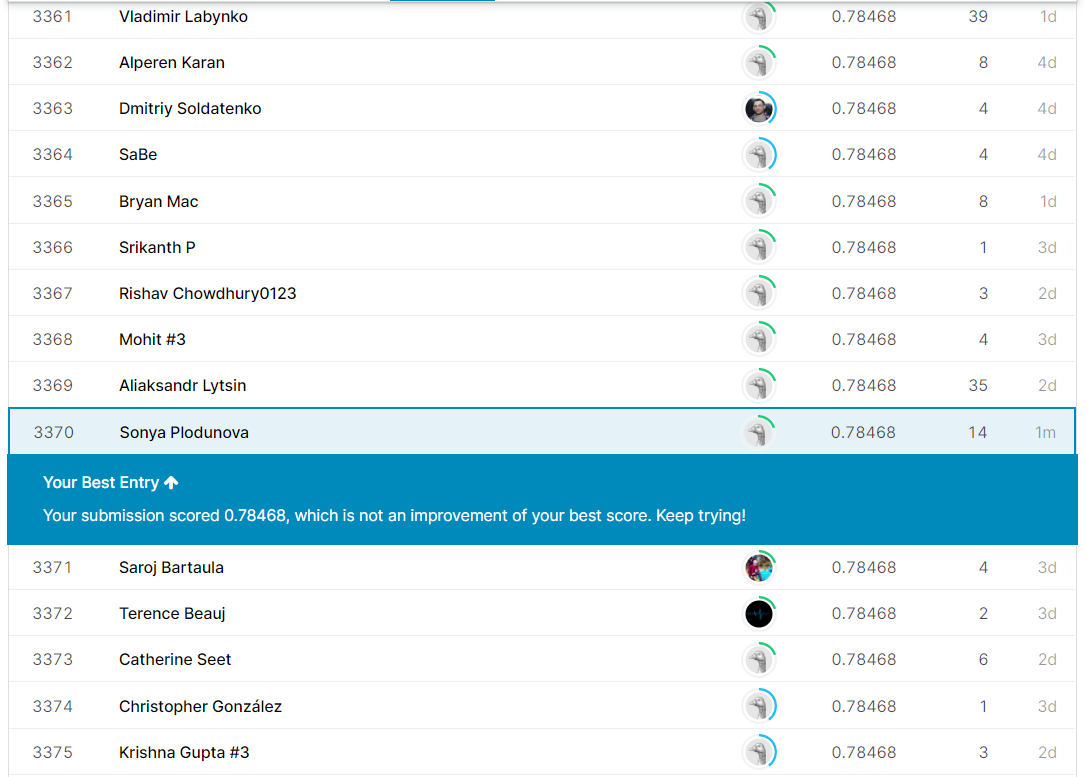

## Part 2: Porto Seguro’s Safe Driver Prediction

Let's build a model that predicts the probability that a driver will initiate an auto insurance claim in the next year.
Read the detailed description and download the dataset https://www.kaggle.com/c/porto-seguro-safe-driver-prediction/data. Put the data into *./data/porto/*.

In [103]:
insurance_data = pd.read_csv(os.path.join(PATH, 'porto', 'train.csv')).set_index('id')

In [104]:
insurance_data.head()

,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
id,,,,,,,,,,,,,,,,,,,,,
7,0,2,2,5,1,0,0,1,0,0,...,9,1,5,8,0,1,1,0,0,1
9,0,1,1,7,0,0,0,0,1,0,...,3,1,1,9,0,1,1,0,1,0
13,0,5,4,9,1,0,0,0,1,0,...,4,2,7,7,0,1,1,0,1,0
16,0,0,1,2,0,0,1,0,0,0,...,2,2,4,9,0,0,0,0,0,0
17,0,0,2,0,1,0,1,0,0,0,...,3,1,1,3,0,0,0,1,1,0


Let's skip EDA for now. We'll use SGDClassifier and build a simple baseline: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html.
Note that loss='log' gives logistic regression.

In [105]:
y = insurance_data['target']
X = insurance_data.drop(columns=['target'])

In [106]:
numeric_features = [column for column in X if not (column.endswith("cat") or column.endswith("bin"))]
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])

categorical_features = [column for column in X if (column.endswith("cat") or column.endswith("bin"))]
categorical_transformer = Pipeline(steps=[('encoder', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', SGDClassifier(loss='log', alpha=0.001, n_jobs=-1, random_state=14))])

In [107]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42)

In [108]:
clf = pipeline.fit(X_train, y_train)

We'll calculate the model accuracy:

In [109]:
accuracy_score(y_true=y_valid, y_pred=clf.predict(X_valid))

0.9631224658945812

Wow! Our model gets ~0.963 accuracy! But is it really good?...

Let's plot the confusion matrix and analyze the errors.

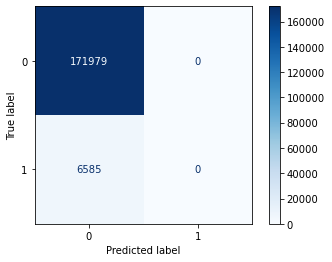

In [110]:
disp = plot_confusion_matrix(clf, X_valid, y_valid,
                             cmap=plt.cm.Blues,
                             normalize=None)

Well, it turns out that our model is completely useless. Let's calculate some basic statistics:

In [111]:
insurance_data.describe()

,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,...,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,0.036448,1.900378,1.358943,4.423318,0.416794,0.405188,0.393742,0.257033,0.163921,0.185304,...,5.441382,1.441918,2.872288,7.539026,0.122427,0.627840,0.554182,0.287182,0.349024,0.153318
std,0.187401,1.983789,0.664594,2.699902,0.493311,1.350642,0.488579,0.436998,0.370205,0.388544,...,2.332871,1.202963,1.694887,2.746652,0.327779,0.483381,0.497056,0.452447,0.476662,0.360295
min,0.000000,0.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.000000,1.000000,2.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5.000000,1.000000,3.000000,7.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,0.000000,3.000000,2.000000,6.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,...,7.000000,2.000000,4.000000,9.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,7.000000,4.000000,11.000000,1.000000,6.000000,1.000000,1.000000,1.000000,1.000000,...,19.000000,10.000000,13.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


As you see, there are less than 4% of positive examples, so we have to deal with a highly imbalanced dataset.

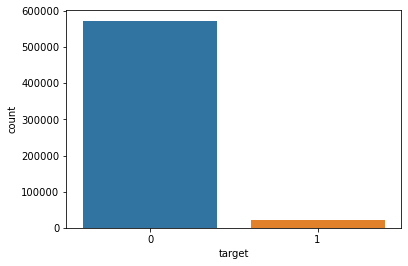

In [112]:
sns.countplot(x='target', data=insurance_data)
plt.show()

Accuracy is not informative here and the Normalized Gini Coefficient will be used instead: https://www.kaggle.com/c/porto-seguro-safe-driver-prediction/overview/evaluation.

In [113]:
# Code for calculating Normalized gini coefficient
# https://www.kaggle.com/c/ClaimPredictionChallenge/discussion/703
def gini(actual, pred, cmpcol = 0, sortcol = 1):  
    assert(len(actual) == len(pred))  
    epsilon = 1e-7
    values = np.asarray(np.c_[actual, pred, np.arange(len(actual))], dtype=np.float)  
    values = values[np.lexsort((values[:, 2], -1 * values[:, 1]))]  
    total = values[:, 0].sum() 
    gini_sum = (values[:, 0].cumsum().sum() + epsilon) / (total + epsilon)  
  
    gini_sum -= (len(actual) + 1) / 2  
    return gini_sum / len(actual)  
  
def gini_normalized(a, p):  
    '''Function to calculate the normalized gini coefficient'''
    return gini(a, p) / gini(a, a)

**(1.5 points)** Prove that the **Normalized Gini Coefficient** is equivalent to **2 x AUC - 1** :

< your proof >

**(0.5 points)** By the way, what other metrics could you suggest for this problem?

< your thoughts >

Let's calculate the Normalized Gini Coefficient:

In [114]:
y_pred = clf.predict_proba(X_valid)[:, 1]

In [115]:
gini_normalized(y_valid, y_pred)

0.2558723581569817

**(0.5 points + Y bonus points)** Try different approaches: oversampling / undersampling, careful feature analysis and feature engineering, etc., to get a reasonable pipeline and improve the model quality. Use cross-validation for model evaluation.

Select the best model, load the test set and make the predictions. Submit them to kaggle.
Y bonus points will be calculated as $\frac{round(200 * \max(score - 0.253, 0))}{2}$, where *score* is your kaggle leaderboard score.

Note: do not use any classification models which have not been covered in the lessons yet.

In [116]:
## your code